In [2]:
import numpy as np
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [3]:
baza=pd.read_csv("Netflix_all.csv")

TOP 10 movies/TV shows on netflix

In [4]:
df = pd.DataFrame(columns=["year", "numMovies", "numTvShow"])

for leto in range(2008, 2020, 1):
    temp = baza[baza["date_added"].str.contains(str(leto))]
    stMovies = len(temp[temp["type"] == "Movie"])
    stTvShow = len(temp[temp["type"] == "TV Show"])
    df = df.append({'year' : leto , 'numMovies' : stMovies, 'numTvShow' : stTvShow} , ignore_index=True)

ValueError: cannot mask with array containing NA / NaN values

Text(0.5, 1.0, 'Zoom for years between 2008 and 2014')

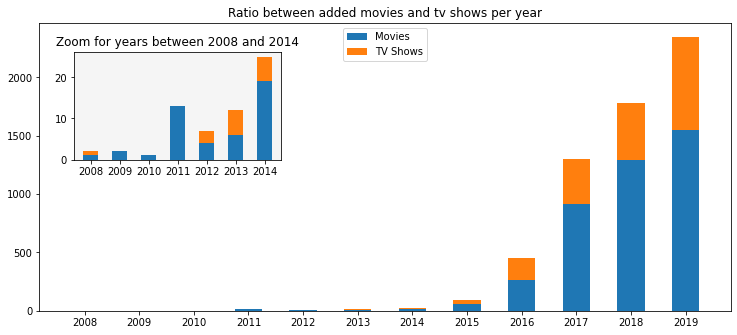

In [88]:
fig = plt.figure(figsize=(12, 5))
ind = np.arange(2008, 2020, 1)    # the x locations for the groups
ind2 = np.arange(2008, 2015, 1)
width = 0.5       # the width of the bars: can also be len(x) sequence

plt1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
plt2 = fig.add_axes([0.14, 0.52, 0.24, 0.3], facecolor='whitesmoke')

plt1.bar(df["year"], df["numMovies"], width)
plt1.bar(df["year"], df["numTvShow"], width,bottom=df["numMovies"])
plt1.legend(("Movies", "TV Shows"),loc=9)
plt1.xaxis.set_major_locator(mticker.FixedLocator(ind))
plt1.set_title('Ratio between added movies and tv shows per year')


plt2.bar(ind2, df[df["year"] < 2015]["numMovies"], width)
plt2.bar(ind2, df[df["year"] < 2015]["numTvShow"], width, bottom=df[df["year"] < 2015]["numMovies"])
plt2.xaxis.set_major_locator(mticker.FixedLocator(ind2))
plt2.set_title('Zoom for years between 2008 and 2014')

In [12]:
actorsMovies = baza[baza["type"] == "Movie"]
actorsMovies = actorsMovies["cast"].str.split(", ")
movieActors = {}
for movie in actorsMovies:
    for actor in movie:
        if actor == "0":
            break
        elif actor not in movieActors:
            movieActors[actor] = [1]
        else:
            movieActors[actor][0] += 1
movieActors = pd.DataFrame.from_dict(movieActors, orient='index')
movieActors.columns = ['st']
movieActors = movieActors.sort_values(by=['st'], ascending=False)

topTenMovieActors = movieActors.head(10).drop(columns=['st']).reset_index()
topTenMovieActors.columns = ['Top ten movie actors']
topTenMovieActors


,Top ten movie actors
0,Anupam Kher
1,Shah Rukh Khan
2,Om Puri
3,Naseeruddin Shah
4,Akshay Kumar
5,Paresh Rawal
6,Amitabh Bachchan
7,Boman Irani
8,Kareena Kapoor
9,Kay Kay Menon


In [11]:
actorsTvShow = baza[baza["type"] == "TV Show"]
actorsTvShow = actorsTvShow["cast"].str.split(", ")
TvShowActors = {}
for movie in actorsTvShow:
    for actor in movie:
        if actor == "0":
            break
        elif actor not in TvShowActors:
            TvShowActors[actor] = [1]
        else:
            TvShowActors[actor][0] += 1
TvShowActors = pd.DataFrame.from_dict(TvShowActors, orient='index')
TvShowActors.columns = ['st']
TvShowActors = TvShowActors.sort_values(by=['st'], ascending=False)

topTenTvShowActors = TvShowActors.head(10).drop(columns=['st']).reset_index()
topTenTvShowActors.columns = ['Top ten tv show actors']
topTenTvShowActors

,Top ten tv show actors
0,Takahiro Sakurai
1,Yuki Kaji
2,Daisuke Ono
3,David Attenborough
4,Jun Fukuyama
5,Ashleigh Ball
6,Tomokazu Sugita
7,Hiroshi Kamiya
8,Ai Kayano
9,Yuichi Nakamura


In [10]:
filmi = baza[baza["type"] == "Movie"]
serije = baza[baza["type"] == "TV Show"]

print("Avrage rate of a Movie is:  %1.2f" % (filmi["averageRating"].mean()))
print("Avrage rate of a TV Show is:  %1.2f" % (serije["averageRating"].mean()))


Avrage rate of a Movie is:  6.02
Avrage rate of a TV Show is:  6.51
